# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 6</center>

# <center>Linear Regression for Supervised Learning</center>

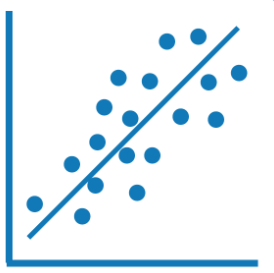

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Loading Data </li>
<li> Creating Simple Linear Model</li>
<li> Explore Linear Model attributes</li>
<li> Find MSE </li>
<li> Make Predictions for simple linear model</li>
<li> Create Multiple Linear Model </li>
<li> Make Predictions for multiple linear model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use sklearn library to create first machine learning model and implement sklearn LinearRegression model for both univariate and mulitple features.

By the end of the lab, you should be able to :
- Load required dataset and library for training machine learning model


- Implement sklearn LinearRegression algorithm for simple linear model as well as multiple linear model.


- Find MSE for the created model


- Make prediction for unseen data

## <font color = blue>1. Loading Data

    - Load boston housing data from sklearn.datasets module. Create dataframe from the boston data.

In [1]:
#solution

from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [2]:
import pandas as pd

df = pd.DataFrame(boston.data, columns = boston.feature_names)
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [3]:
df['target'] = boston.target
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [4]:
df.shape

(506, 14)

## <font color = blue>2. Creating simple Linear Model

INSTRUCTIONS:-
    
- The boston dataset contain many features. To implement simple linear regression model, let us choose any one feature that is mostly related to the target feature. 
    
    
- Use dataframe `corr()` method to check correlation between each features with target feature. Use heatmap to display the correlation.
    
    
- Which feature is mostly related to the target feature? Choose that feature to create linear Model.
    
    
- Import `LinearRegression()` from sklearn `linear_model` module. Create LinearRegression() object and fit the dataset to train the model


<AxesSubplot:>

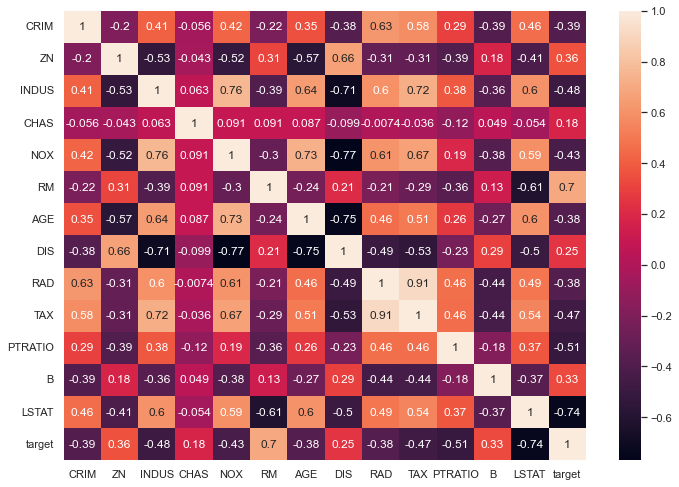

In [5]:
#Solution
#creating correlation between different features and target
data = df.corr()

import seaborn as sns
sns.set(rc={'figure.figsize': (11.7,8.27)})
sns.heatmap(data, annot = True)

In [6]:
#create linear model
from sklearn.linear_model import LinearRegression
#create LinearRegression object/model

model = LinearRegression()
x = df[['RM']]    ## expects value in 2D array form 
y = df.target

#train the model/fit data to model
model.fit(x,y)  


LinearRegression()

## <font color = blue>3. Explore Linear Model attributes


In [7]:
#use coef_ attributes to get weights. We have only one weights since it is simple linear model

model.coef_
#this is our 'w' for (f(x) = wx + b)

array([9.10210898])

In [8]:
#use intercept_ attributes to get the bias value

model.intercept_
#this is the value of 'b'

-34.67062077643857

In [9]:
# predict(X) is same method as the one below
y_pred = model.coef_*6.575 + model.intercept_
y_pred

array([25.17574577])

In [10]:
model.predict([[6.575]])

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([25.17574577])

## <font color = blue>4. Find MSE
- sklearn provides `mean_squared_error()` method to check MSE for a given model. `mean_squared_error()` expect y_prediction and actual y value as its paramters. use linear model's `predict()` method to get y_prediction.
    
 `sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)`

In [11]:
#creating y_pred

from sklearn.metrics import mean_squared_error
y_predict = model.predict(df[['RM']])
y_predict

MSE = mean_squared_error(y_predict, y)
MSE


43.60055177116956

## <font color = blue>5. Make Predictions


In [12]:
#Use predict method to make prediction to unseen data
# the reason for 2D is because there can be multiple prediction 
# x_sam = [[6],[7]] doesnt mean its multiple feature
x_sample = [[6]]
model.predict(x_sample)


C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.94203311])

## <font color = blue>6. Create Multiple Linear Regression Model

- Explore the Multiple Linear regression model choosing any number of features you are comfortable with. Remember you can use the same LinearRegression() algorithm.

In [20]:
#Solution

from sklearn.linear_model import LinearRegression
obj = LinearRegression()
X = df[['RM','LSTAT','PTRATIO']]
b = df.target

obj.fit(X,y)

LinearRegression()

In [21]:
from sklearn.metrics import mean_squared_error
y_pre = obj.predict(df[['RM','LSTAT','PTRATIO']])
y_pre
MSE = mean_squared_error(y_pre, b)
MSE

27.13040575849706

## <font color = blue>7. Make Prediction for Multi linear Model

In [22]:
#Solution

new_xsamp = [[7,8,9]]
obj.predict(new_xsamp)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37.22410961])

# TODO/HOMEWORK : Creating Linear Model
- Create multiple Linear Regression model with the same features you chose in subtask 6 above. Use any feature scaling techniques to scale the features and train the model. 


- Explore the difference in the result when using unscaled and scaled features.

In [23]:
ndf = pd.DataFrame(boston.data, columns = boston.feature_names)
ndf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [28]:
ndf['target'] = boston.target
ndf.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
numeric = scaler.fit_transform(ndf)
minmax = pd.DataFrame(numeric, columns=ndf.columns)
minmax

CRIM    ZN     INDUS  CHAS       NOX        RM       AGE       DIS  \
0    0.000000  0.18  0.067815   0.0  0.314815  0.577505  0.641607  0.269203   
1    0.000236  0.00  0.242302   0.0  0.172840  0.547998  0.782698  0.348962   
2    0.000236  0.00  0.242302   0.0  0.172840  0.694386  0.599382  0.348962   
3    0.000293  0.00  0.063050   0.0  0.150206  0.658555  0.441813  0.448545   
4    0.000705  0.00  0.063050   0.0  0.150206  0.687105  0.528321  0.448545   
..        ...   ...       ...   ...       ...       ...       ...       ...   
501  0.000633  0.00  0.420455   0.0  0.386831  0.580954  0.681771  0.122671   
502  0.000438  0.00  0.420455   0.0  0.386831  0.490324  0.760041  0.105293   
503  0.000612  0.00  0.420455   0.0  0.386831  0.654340  0.907312  0.094381   
504  0.001161  0.00  0.420455   0.0  0.386831  0.619467  0.889804  0.114514   
505  0.000462  0.00  0.420455   0.0  0.386831  0.473079  0.802266  0.125072   

          RAD       TAX   PTRATIO         B     LSTAT    target  
0    0.000000  0.208015  0.287234  1.000000  0.089680  0.422222  
1    0.043478  0.104962  0.553191  1.000000  0.204470  0.368889  
2    0.043478  0.104962  0.553191  0.989737  0.063466  0.660000  
3    0.086957  0.066794  0.648936  0.994276  0.033389  0.631111  
4    0.086957  0.066794  0.648936  1.000000  0.099338  0.693333  
..        ...       ...       ...       ...       ...       ...  
501  0.000000  0.164122  0.893617  0.987619  0.219095  0.386667  
502  0.000000  0.164122  0.893617  1.000000  0.202815  0.346667  
503  0.000000  0.164122  0.893617  1.000000  0.107892  0.420000  
504  0.000000  0.164122  0.893617  0.991301  0.131071  0.377778  
505  0.000000  0.164122  0.893617  1.000000  0.169702  0.153333  

[506 rows x 14 columns]

In [43]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
newX = minmax[['RM','LSTAT','PTRATIO']]
newb = minmax.target
model2.fit(newX,newb)

LinearRegression()

In [45]:
from sklearn.metrics import mean_squared_error
y1_predict = model2.predict(newX)
y1_predict
MSE = mean_squared_error(y1_predict, newb)
MSE

0.013397731238763979